# Credit Card Fraud Detection

### Datasets : An Overview

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.


### Problem statement

The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 284,807  thousand rows of data.

### Headers

* 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

* 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

* 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/nouf/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Class', ylabel='count'>

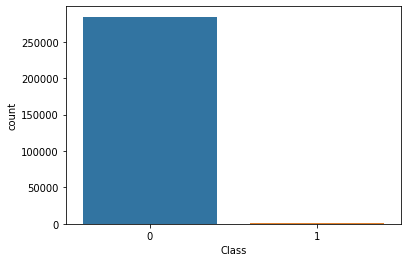

In [3]:
sns.countplot('Class', data=df)

### Train - test splet

In [4]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123,stratify=df["Class"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["Class"])

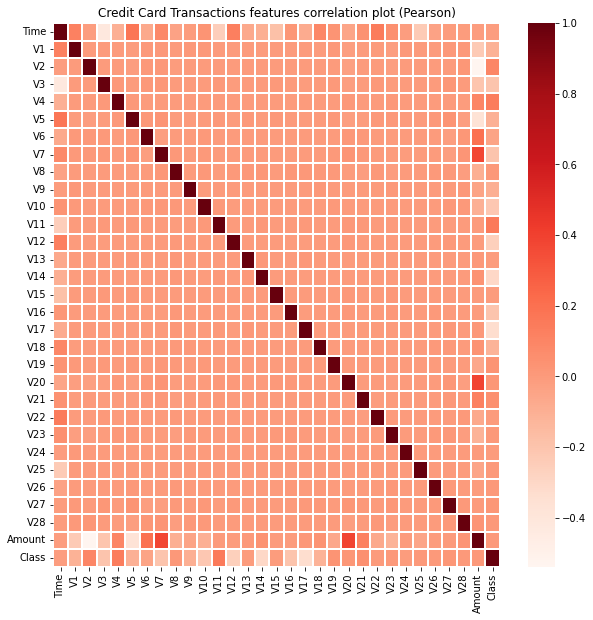

In [5]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

### Fetchr engineering

In [6]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['Time'].values.reshape(-1,1))

df_train.drop(['Time','Amount'], axis=1, inplace=True)

# 

In [7]:
X_train = df_train.drop(["Class"], axis = 1)
y_train = df_train["Class"]

### val

In [8]:
df_val['scaled_amount'] = rob_scaler.fit_transform(df_val['Amount'].values.reshape(-1,1))
df_val['scaled_time'] = rob_scaler.fit_transform(df_val['Time'].values.reshape(-1,1))
df_val.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
X_val = df_val.drop(["Class"], axis = 1)
y_val = df_val["Class"]

# Models

# LogisticRegression

### Train

In [10]:
log_cfl = LogisticRegression(C=0.95, random_state=0,solver='liblinear')

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.90      0.64      0.75       295

    accuracy                           1.00    170883
   macro avg       0.95      0.82      0.87    170883
weighted avg       1.00      1.00      1.00    170883

[[170567     21]
 [   106    189]]


### val

In [11]:
log_cfl = LogisticRegression(C=0.95, random_state=0,solver='liblinear')

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.61      0.71        99

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     9]
 [   39    60]]


# KNeighborsClassifier

### Train

In [12]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.95      0.81      0.87       295

    accuracy                           1.00    170883
   macro avg       0.98      0.90      0.94    170883
weighted avg       1.00      1.00      1.00    170883

[[170576     12]
 [    57    238]]


### val 

In [13]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.78      0.83        99

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     9]
 [   22    77]]


# Voting Classifier

In [14]:
import xgboost as xgb

In [15]:
from sklearn.ensemble import VotingClassifier


In [16]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
DT_clf = DecisionTreeClassifier(max_depth=2)
rf_cfl =  RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

### Train

# Voting (xgb , dt , rf)

In [17]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[06:45:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.90      0.76      0.82       295

    accuracy                           1.00    170883
   macro avg       0.95      0.88      0.91    170883
weighted avg       1.00      1.00      1.00    170883

[[170563     25]
 [    71    224]]


### val

In [18]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[06:46:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.72      0.77        99

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56849    14]
 [   28    71]]


# 

# Voting (xgb , log , knn)

In [19]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
log_cfl = LogisticRegression(C=0.95, random_state=0,solver='liblinear')

In [20]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[06:47:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.94      0.81      0.87       295

    accuracy                           1.00    170883
   macro avg       0.97      0.90      0.93    170883
weighted avg       1.00      1.00      1.00    170883

[[170574     14]
 [    57    238]]


In [21]:
vot = VotingClassifier(estimators = [('xgb', xgb_cfl), ('dt', log_cfl), ('rf', KNN)] ,voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[06:56:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.77      0.83        99

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     9]
 [   23    76]]


# RandomForestClassifier

### Train

In [22]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.88      0.59      0.71       295

    accuracy                           1.00    170883
   macro avg       0.94      0.80      0.85    170883
weighted avg       1.00      1.00      1.00    170883

[[170565     23]
 [   120    175]]


### val

In [23]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.54      0.65        99

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    11]
 [   46    53]]


In [24]:
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier

### Train

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
DT_clf = DecisionTreeClassifier(max_depth=2)

In [27]:
bag_clf = BaggingClassifier(DT_clf, n_estimators=200 , n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_predict = bag_clf.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.75      0.80       295

    accuracy                           1.00    170883
   macro avg       0.92      0.88      0.90    170883
weighted avg       1.00      1.00      1.00    170883

[[170548     40]
 [    73    222]]


### val

In [28]:
bag_clf = BaggingClassifier(DT_clf, n_estimators=200 , n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_predict = bag_clf.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.73      0.76        99

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56844    19]
 [   27    72]]


### StackingClassifier

### Train

In [29]:
from sklearn.ensemble import StackingClassifier

In [30]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
DT_clf = DecisionTreeClassifier(max_depth=2)
rf_cfl =  RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

# Stacking (xgb , log , rf)

In [31]:
STC = StackingClassifier([('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[07:04:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:05:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:05:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:05:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### val

In [32]:
STC = StackingClassifier([('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)])
STC.fit(X_train, y_train)

y_predict = STC.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[07:09:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Stacking (xgb , log , knn)

In [33]:
STC = StackingClassifier([('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[07:14:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:15:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [34]:
STC = StackingClassifier([('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[07:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:32:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:32:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### SVM 

In [35]:
from sklearn import svm

### Train

In [36]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.82      0.84       295

    accuracy                           1.00    170883
   macro avg       0.93      0.91      0.92    170883
weighted avg       1.00      1.00      1.00    170883

[[170546     42]
 [    53    242]]


### Val

In [38]:
from sklearn import svm

In [39]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.82      0.82        99

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56846    17]
 [   18    81]]


# DecisionTreeClassifier

### Train

In [40]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.76      0.80       295

    accuracy                           1.00    170883
   macro avg       0.92      0.88      0.90    170883
weighted avg       1.00      1.00      1.00    170883

[[170547     41]
 [    70    225]]


### val

In [41]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.74      0.76        99

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    20]
 [   26    73]]


# XGBClassifier

### Train

In [42]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[08:09:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.94      0.82      0.87       295

    accuracy                           1.00    170883
   macro avg       0.97      0.91      0.94    170883
weighted avg       1.00      1.00      1.00    170883

[[170573     15]
 [    54    241]]


### val

In [43]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[08:09:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.78      0.83        99

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56853    10]
 [   22    77]]


# Test

### After trying more than one model, it became clear that the best prediction model is the SVM model because we are interested in ( recall ).

In [44]:
df_test['scaled_amount'] = rob_scaler.fit_transform(df_test['Amount'].values.reshape(-1,1))
df_test['scaled_time'] = rob_scaler.fit_transform(df_test['Time'].values.reshape(-1,1))

df_test.drop(['Time','Amount'], axis=1, inplace=True)

In [45]:
X_test= df_test.drop(["Class"], axis = 1)
y_test = df_test["Class"]

In [46]:
from sklearn import svm

In [47]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.70      0.74        98

    accuracy                           1.00     56962
   macro avg       0.89      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56845    19]
 [   29    69]]


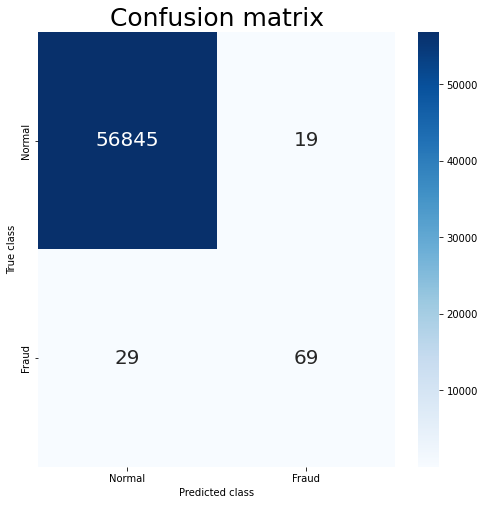

In [48]:
LABELS = ['Normal', 'Fraud'] 
plt.figure(figsize =(8,8)) 
sns.heatmap(confusion_matrix(y_test, y_predict), xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d",  cmap="Blues",annot_kws={"size": 20}); 
plt.title("Confusion matrix",fontsize = 25) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()